In [1]:
import pandas as pd
import time
import numpy as np
np.seterr(invalid='ignore')
import nbimporter
from PPP import PPP
from defense_PPP import defense_PPP
from court import create_court
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
pd.options.display.max_columns = 999

In [9]:
file_path = 'Nuggets/data/Offense/Team.json'
defense_path = 'Nuggets/data/Defense/Team.json'
wolves_offense = 'Opponent/Wolves/Offense/Team.json'

with open (file_path, 'r') as f:
    file = json.load(f)
    
with open (defense_path, 'r') as d:
    defense_file = json.load(d)
    
with open (wolves_offense, 'r') as o:
    opp_off = json.load(o)
    
print(file.keys())

dict_keys(['ovr_data', 'SMZ2', 'Rim', '3ptZ2', '3ptZ4', 'LMZ4', '3ptZ3', 'LMZ3', 'LMZ2', 'SMZ3', 'LMZ5', '3ptZ5', '3ptZ1', 'SMZ1'])


In [12]:
data_PPP = file['ovr_data']['data']
data_PPP = pd.DataFrame(data_PPP).transpose()
data_PPP = PPP(data_PPP)
print('NUGGETS OFFENSE PPP')
data_PPP

NUGGETS OFFENSE PPP


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.5,20.0,3,46.2,0.0,28.26,3.48,13,38.5,2.92,10,10.0,4.2,0.29,14.7,3,53.8,0.0,18.18,3.45,12,22.2,3.33,2,0.0,4.0,0.75,34.3,0,46.2,0.0,37.5,3.5,4,75.0,2.0,8,12.5,4.0
PNR Screener,1.0,5.4,1,0.0,0.0,58.33,3.67,2,100.0,2.5,4,25.0,4.25,1.0,7.4,1,100.0,0.0,58.33,3.67,3,100.0,2.5,4,25.0,4.25,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.25
DHO Ball Handler,1.0,6.2,0,50.0,0.0,50.0,3.62,7,57.1,3.43,1,0.0,5.0,1.0,4.2,0,50.0,0.0,50.0,2.75,4,50.0,2.75,0,N/A,N/A,1.0,11.4,0,50.0,0.0,50.0,4.5,3,66.7,4.33,1,0.0,N/A
DHO Screener,1.0,1.5,0,0.0,0.0,50.0,4.5,2,50.0,4.5,0,N/A,N/A,1.0,2.1,0,100.0,0.0,50.0,4.5,2,50.0,4.5,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,0.85,19.0,4,12.1,0.21,51.67,2.68,17,52.9,2.59,2,0.0,3.5,0.97,22.9,4,87.9,0.25,60.62,2.75,19,60.0,2.67,2,0.0,4.0,0.0,8.6,0,12.1,0.0,0.0,2.33,2,0.0,2.0,1,0.0,4.0
TRANSITION,1.41,13.1,4,52.9,0.0,92.31,3.69,7,85.7,3.57,6,66.7,3.83,1.12,8.4,4,47.1,0.0,112.5,3.5,5,100.0,3.67,3,100.0,3.0,1.67,25.7,0,52.9,0.0,83.33,3.78,4,75.0,3.5,5,60.0,3.0
Attacking Closeouts,1.0,10.0,0,30.8,0.0,50.0,2.54,9,55.6,2.22,4,25.0,3.25,1.11,9.5,0,69.2,0.0,55.56,2.33,8,62.5,2.38,1,0.0,2.0,0.75,11.4,0,30.8,0.0,37.5,3.0,1,0.0,1.0,3,33.3,2.0
Catch & Shoot,0.55,15.4,0,0.0,0.0,27.5,3.9,2,50.0,2.0,18,16.7,4.11,0.55,21.1,0,100.0,0.0,27.5,3.9,2,50.0,2.0,18,16.7,4.11,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.11
Off Ball Screens,0.67,2.3,1,33.3,0.0,50.0,3.5,1,100.0,2.0,1,0.0,5.0,1.0,2.1,1,66.7,0.0,100.0,2.0,2,100.0,2.0,0,N/A,N/A,0.0,2.9,0,33.3,0.0,0.0,5.0,0,N/A,N/A,1,0.0,N/A
Cutting,0.0,3.1,0,0.0,0.0,0.0,1.5,4,0.0,1.5,0,N/A,N/A,0.0,4.2,0,100.0,0.0,0.0,1.5,4,0.0,1.5,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


In [44]:
rim_data = file['Rim']['data']
rim_data = pd.DataFrame(rim_data).transpose()
rim_data = PPP(rim_data)
print('NUGGETS RIM PPP')
rim_data

NUGGETS RIM PPP


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.75,18.6,0,50.0,0.0,37.5,2.25,8,37.5,2.25,0,N/A,N/A,0.0,11.8,0,50.0,0.0,0.0,2.5,4,0.0,2.5,0,N/A,N/A,1.5,44.4,0,50.0,0.0,75.0,2.0,4,75.0,2.0,0,N/A,N/A
PNR Screener,2.0,4.7,0,0.0,0.0,100.0,2.5,2,100.0,2.5,0,N/A,N/A,2.0,5.9,0,100.0,0.0,100.0,2.5,2,100.0,2.5,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,2.0,2.3,0,100.0,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,2.0,11.1,0,100.0,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A
DHO Screener,2.0,2.3,0,0.0,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A,2.0,2.9,0,100.0,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,1.16,30.0,1,15.5,0.18,65.56,2.55,11,63.6,2.55,0,N/A,N/A,1.38,32.0,1,84.5,0.22,79.45,2.67,10,77.8,2.67,0,N/A,N/A,0.0,22.2,0,15.5,0.0,0.0,2.0,2,0.0,2.0,0,N/A,N/A
TRANSITION,1.43,16.3,2,28.6,0.0,100.0,3.4,5,100.0,3.4,0,N/A,N/A,1.2,14.7,2,71.4,0.0,100.0,3.67,5,100.0,3.67,0,N/A,N/A,2.0,22.2,0,28.6,0.0,100.0,3.0,2,100.0,3.0,0,N/A,N/A
Attacking Closeouts,0.8,11.6,0,0.0,0.0,40.0,1.8,5,40.0,1.8,0,N/A,N/A,0.8,14.7,0,100.0,0.0,40.0,1.8,5,40.0,1.8,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Catch & Shoot,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Off Ball Screens,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,0.0,9.3,0,0.0,0.0,0.0,1.5,4,0.0,1.5,0,N/A,N/A,0.0,11.8,0,100.0,0.0,0.0,1.5,4,0.0,1.5,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


'0.06'

NUGGETS OVR TEAM SHOT CHART
---------------------------
Total PPP: 0.81
Total TS%: 45.39 on 3.29 SQ
Total 3pt%: 18.5 on 4.02 SQ

Total FTR: 0.06

Rim PPP: 1.11
Rim TS%: 60.18 on 2.51 SQ


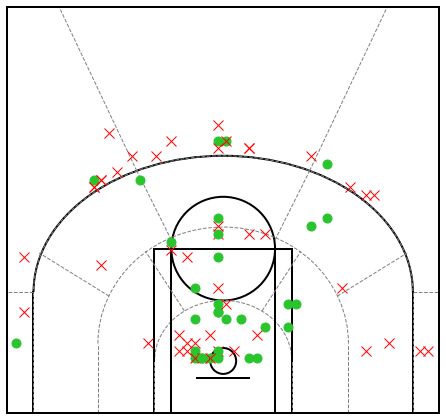

In [61]:
shots = file['ovr_data']['shooting_locations']

game_total_PPP = data_PPP['Total PPP']['TOTAL']
game_ovr_ts_per = data_PPP['Total TS%']['TOTAL']
game_ovr_3pt_per = data_PPP['Shooting 3pt FG%']['TOTAL']
game_ovr_SQ = data_PPP['Total SQ']['TOTAL']
game_ovr_3pt_SQ = data_PPP['Total 3pt SQ']['TOTAL']

game_ovr_ftr = data_PPP['Shooting FTR']['TOTAL']

game_rim_PPP = rim_data['Total PPP']['TOTAL']
game_rim_ts_per = rim_data['Total TS%']['TOTAL']
game_rim_SQ = rim_data['Total SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(6, 5.64))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

for shot in shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        ax.plot(x,y, marker='x', color='red', markersize=10)
'''
    if res == 11: # Free Throws
        ax.plot(x,y, marker='^', color='#2393de', markersize=10)
    if res == 20: # Turnovers
        ax.plot(x,y, marker='D', color='#f5c133', markersize=8)
    if res == 30: # And-1
        ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
    '''
print('NUGGETS OVR TEAM SHOT CHART')
print('---------------------------')
print(f'Total PPP: {game_total_PPP}')
print(f'Total TS%: {game_ovr_ts_per} on {game_ovr_SQ} SQ')
print(f'Total 3pt%: {game_ovr_3pt_per} on {game_ovr_3pt_SQ} SQ\n')
print(f'Total FTR: {game_ovr_ftr}\n')
print(f'Rim PPP: {game_rim_PPP}')
print(f'Rim TS%: {game_rim_ts_per} on {game_rim_SQ} SQ')
plt.show()

In [58]:
opp_PPP = opp_off['ovr_data']['data']
opp_PPP = pd.DataFrame(opp_PPP).transpose()
opp_PPP = PPP(opp_PPP)
opp_PPP

,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.97,19.8,2,31.6,0.22,53.14,3.72,10,40.0,3.4,8,37.5,4.12,1.08,16.4,2,68.4,0.17,62.11,3.5,9,50.0,3.5,5,50.0,3.5,0.73,36.2,0,31.6,0.33,36.34,4.17,2,0.0,3.0,4,25.0,3.5
PNR Screener,0.29,6.3,2,0.0,0.5,20.49,4.0,2,0.0,3.0,2,0.0,5.0,0.29,7.6,2,100.0,0.5,20.49,4.0,4,0.0,3.0,2,0.0,5.0,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,5.0
DHO Ball Handler,1.0,1.8,0,0.0,0.0,50.0,1.0,2,50.0,1.0,0,N/A,N/A,1.0,2.2,0,100.0,0.0,50.0,1.0,2,50.0,1.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,0.0,0.9,0,100.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,0.0,5.3,0,100.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A
ISOLATION,0.85,29.8,5,21.4,0.15,50.43,2.5,21,42.9,2.14,5,40.0,4.0,0.89,28.3,5,78.6,0.21,55.39,2.11,23,44.4,2.06,2,100.0,3.0,0.71,36.8,0,21.4,0.0,35.71,3.57,3,33.3,2.67,4,25.0,3.0
TRANSITION,1.54,13.6,3,22.2,1.12,96.15,3.12,6,66.7,2.67,2,100.0,4.5,1.29,12.8,3,77.8,1.0,86.81,3.33,8,60.0,3.2,3,100.0,4.0,2.41,17.5,0,22.2,1.5,120.48,2.5,2,100.0,0.0,1,100.0,4.0
Attacking Closeouts,1.3,9.8,0,9.3,0.44,65.06,3.22,8,62.5,3.12,1,0.0,4.0,1.43,10.7,0,90.7,0.5,71.72,3.25,8,71.4,3.14,1,0.0,4.0,0.0,5.3,0,9.3,0.0,0.0,3.0,1,0.0,3.0,0,N/A,4.0
Catch & Shoot,1.33,8.2,0,0.0,0.0,66.67,4.33,0,N/A,N/A,9,44.4,4.33,1.33,9.9,0,100.0,0.0,66.67,4.33,0,N/A,N/A,9,44.4,4.33,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.33
Off Ball Screens,1.33,2.7,0,0.0,0.0,66.67,2.33,3,66.7,2.33,0,N/A,N/A,1.33,3.3,0,100.0,0.0,66.67,2.33,3,66.7,2.33,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,1.29,4.9,0,0.0,0.2,64.34,2.2,5,60.0,2.2,0,N/A,N/A,1.29,6.0,0,100.0,0.2,64.34,2.2,5,60.0,2.2,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


In [65]:
opp_rim_data = opp_off['Rim']['data']
opp_rim_data = pd.DataFrame(opp_rim_data).transpose()
opp_rim_data = PPP(opp_rim_data)
print('OPPONENT RIM PPP')
opp_rim_data

OPPONENT RIM PPP


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.87,12.3,0,41.9,0.33,43.6,3.33,6,33.3,3.33,0,N/A,N/A,1.0,8.5,0,58.1,0.0,50.0,3.5,4,50.0,3.5,0,N/A,N/A,0.69,32.0,0,41.9,1.0,34.72,3.0,2,0.0,3.0,0,N/A,N/A
PNR Screener,0.41,8.7,2,0.0,1.0,34.72,3.0,2,0.0,3.0,0,N/A,N/A,0.41,10.4,2,100.0,1.0,34.72,3.0,4,0.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,1.0,3.6,0,0.0,0.0,50.0,1.0,2,50.0,1.0,0,N/A,N/A,1.0,4.3,0,100.0,0.0,50.0,1.0,2,50.0,1.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,0.0,1.8,0,100.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,0.0,11.1,0,100.0,0.0,0.0,1.0,1,0.0,1.0,0,N/A,N/A
ISOLATION,0.95,29.9,1,11.9,0.29,50.76,1.71,14,42.9,1.71,0,N/A,N/A,1.08,31.4,1,88.1,0.33,58.14,1.67,14,50.0,1.67,0,N/A,N/A,0.0,22.2,0,11.9,0.0,0.0,2.0,2,0.0,2.0,0,N/A,N/A
TRANSITION,1.9,16.0,0,25.9,1.8,94.87,2.8,5,80.0,2.8,0,N/A,N/A,1.81,14.1,0,74.1,1.5,90.36,3.5,6,75.0,3.5,0,N/A,N/A,2.16,25.8,0,25.9,3.0,107.76,0.0,2,100.0,0.0,0,N/A,N/A
Attacking Closeouts,1.27,14.1,0,12.7,0.29,63.45,3.0,7,57.1,3.0,0,N/A,N/A,1.45,14.6,0,87.3,0.33,72.67,3.0,6,66.7,3.0,0,N/A,N/A,0.0,11.1,0,12.7,0.0,0.0,3.0,1,0.0,3.0,0,N/A,N/A
Catch & Shoot,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Off Ball Screens,1.0,3.6,0,0.0,0.0,50.0,2.0,2,50.0,2.0,0,N/A,N/A,1.0,4.3,0,100.0,0.0,50.0,2.0,2,50.0,2.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,1.13,7.9,0,0.0,0.25,56.31,2.0,4,50.0,2.0,0,N/A,N/A,1.13,9.4,0,100.0,0.25,56.31,2.0,4,50.0,2.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


OPPONENT OVR TEAM SHOT CHART
---------------------------
Total PPP: 1.06
Total TS%: 59.35 on 3.06 SQ
Total 3pt%: 44.4 on 4.26 SQ

Total FTR: 0.27

Rim PPP: 1.09
Rim TS%: 57.62 on 2.31 SQ


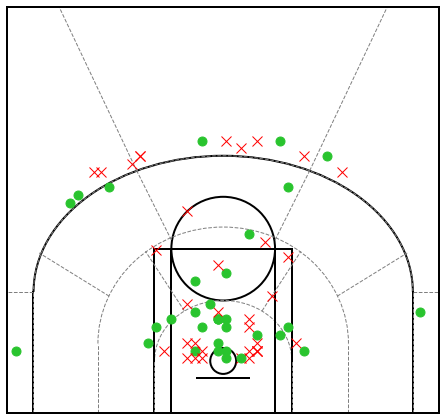

In [67]:
def_shots = opp_off['ovr_data']['shooting_locations']

opp_total_PPP = opp_PPP['Total PPP']['TOTAL']
opp_ovr_ts_per = opp_PPP['Total TS%']['TOTAL']
opp_ovr_3pt_per = opp_PPP['Shooting 3pt FG%']['TOTAL']
opp_ovr_SQ = opp_PPP['Total SQ']['TOTAL']
opp_ovr_3pt_SQ = opp_PPP['Total 3pt SQ']['TOTAL']

opp_ovr_ftr = opp_PPP['Shooting FTR']['TOTAL']

opp_rim_PPP = opp_rim_data['Total PPP']['TOTAL']
opp_rim_ts_per = opp_rim_data['Total TS%']['TOTAL']
opp_rim_SQ = opp_rim_data['Total SQ']['TOTAL']

# Draw basketball court
def_fig = plt.figure(figsize=(6, 5.64))
def_ax = def_fig.add_axes([0, 0, 1, 1])
def_ax = create_court(def_ax, 'black')

for shot in def_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        def_ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        def_ax.plot(x,y, marker='x', color='red', markersize=10)
        '''
    if res == 11: # Free Throws
        def_ax.plot(x,y, marker='^', color='#2393de', markersize=10)
    if res == 20: # Turnovers
        def_ax.plot(x,y, marker='D', color='#f5c133', markersize=8)
    if res == 30: # And-1
        def_ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
    '''
print('OPPONENT OVR TEAM SHOT CHART')
print('---------------------------')
print(f'Total PPP: {opp_total_PPP}')
print(f'Total TS%: {opp_ovr_ts_per} on {opp_ovr_SQ} SQ')
print(f'Total 3pt%: {opp_ovr_3pt_per} on {opp_ovr_3pt_SQ} SQ\n')
print(f'Total FTR: {opp_ovr_ftr}\n')
print(f'Rim PPP: {opp_rim_PPP}')
print(f'Rim TS%: {opp_rim_ts_per} on {opp_rim_SQ} SQ')
plt.show()

In [74]:
edwards_offense = 'Opponent/Wolves/Offense/Anthony Edwards.json'

with open (edwards_offense, 'r') as a:
    edwards = json.load(a)
    
edwards_PPP = edwards['ovr_data']['data']
edwards_PPP = pd.DataFrame(edwards_PPP).transpose()
edwards_PPP = PPP(edwards_PPP)
print('EDWARDS OFFENSE PPP')
edwards_PPP

EDWARDS OFFENSE PPP


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,0.89,27.0,2,13.0,1.33,63.03,3.0,2,50.0,3.0,1,0.0,3.0,0.68,28.0,2,87.0,0.67,51.55,3.0,3,50.0,3.0,2,0.0,3.0,2.27,22.0,0,13.0,1.0,113.64,N/A,0,N/A,N/A,0,N/A,3.0
PNR Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,0.33,24.0,1,33.3,0.0,20.0,3.6,3,33.3,3.0,2,0.0,4.5,0.5,19.0,1,66.7,0.0,33.33,3.0,4,33.3,3.0,0,N/A,N/A,0.0,50.0,0,33.3,0.0,0.0,4.5,0,N/A,N/A,2,0.0,N/A
TRANSITION,1.7,30.6,1,11.5,1.5,97.89,3.25,3,66.7,3.0,1,100.0,4.0,1.63,32.2,1,88.5,1.0,95.49,3.25,4,66.7,3.0,2,100.0,4.0,2.27,22.0,0,11.5,1.0,113.64,N/A,0,N/A,N/A,0,N/A,4.0
Attacking Closeouts,1.0,8.0,0,50.0,0.0,50.0,3.5,2,50.0,3.5,0,N/A,N/A,2.0,4.8,0,50.0,0.0,100.0,4.0,1,100.0,4.0,0,N/A,N/A,0.0,25.0,0,50.0,0.0,0.0,3.0,1,0.0,3.0,0,N/A,N/A
Catch & Shoot,0.0,8.0,0,0.0,0.0,0.0,4.5,0,N/A,N/A,2,0.0,4.5,0.0,9.5,0,100.0,0.0,0.0,4.5,0,N/A,N/A,2,0.0,4.5,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,4.5
Off Ball Screens,2.0,8.0,0,0.0,0.0,100.0,3.0,2,100.0,3.0,0,N/A,N/A,2.0,9.5,0,100.0,0.0,100.0,3.0,2,100.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


In [81]:
edwards_rim_data = edwards['Rim']['data']
edwards_rim_data = pd.DataFrame(edwards_rim_data).transpose()
edwards_rim_data = PPP(edwards_rim_data)
print('EDWARDS RIM PPP')
edwards_rim_data

EDWARDS RIM PPP


,Total PPP,% of Poss.,Total TO,Total Creation %,Total FTR,Total TS%,Total SQ,Total 2pt FGA,Total 2pt FG%,Total 2pt SQ,Total 3pt FGA,Total 3pt FG%,Total 3pt SQ,Shooting PPP,% of Shooting Poss.,Shooting TO,Shooting Freq.,Shooting FTR,Shooting TS%,Shooting SQ,Shooting 2pt Poss.,Shooting 2pt FG%,Shooting 2pt SQ,Shooting 3pt Poss.,Shooting 3pt FG%,Shooting 3pt SQ,Creation PPP,% of Creation Poss.,Creation TO,Creation %,Creation FTR,Creation TS%,Creation SQ,Creation 2pt Poss.,Creation 2pt FG%,Creation 2pt SQ,Creation 3pt Poss.,Creation 3pt FG%,Creation 3pt SQ
PNR Ball Handler,2.13,23.5,0,46.8,2.0,106.38,5.0,1,100.0,5.0,0,N/A,N/A,2.0,16.7,0,53.2,0.0,100.0,5.0,1,100.0,5.0,0,N/A,N/A,2.27,44.0,0,46.8,1.0,113.64,N/A,0,N/A,N/A,0,N/A,N/A
PNR Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Ball Handler,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
DHO Screener,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
ISOLATION,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
TRANSITION,1.77,70.5,0,15.6,2.0,88.65,3.0,3,66.7,3.0,0,N/A,N/A,1.68,79.3,0,84.4,1.33,84.03,3.0,4,66.7,3.0,0,N/A,N/A,2.27,44.0,0,15.6,1.0,113.64,N/A,0,N/A,N/A,0,N/A,N/A
Attacking Closeouts,0.0,12.5,0,100.0,0.0,0.0,3.0,1,0.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,0.0,50.0,0,100.0,0.0,0.0,3.0,1,0.0,3.0,0,N/A,N/A
Catch & Shoot,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Off Ball Screens,2.0,12.5,0,0.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A,2.0,16.7,0,100.0,0.0,100.0,3.0,1,100.0,3.0,0,N/A,N/A,N/A,0.0,0,0.0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A
Cutting,N/A,0.0,0,0,0.0,N/A,0,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A,N/A,0.0,0,0,0.0,N/A,N/A,0,N/A,N/A,0,N/A,N/A


EDWARDS OVR TEAM SHOT CHART
---------------------------
Total PPP: 1.02
Total TS%: 60.27 on 3.44 SQ
Total 3pt%: 25.0 on 4.17 SQ

Total FTR: 0.4

Rim PPP: 1.68
Rim TS%: 84.03 on 3.33 SQ


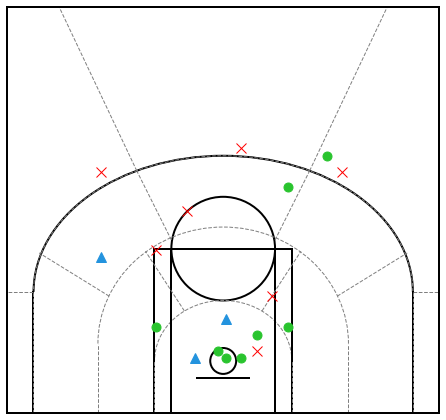

In [84]:
edwards_shots = edwards['ovr_data']['shooting_locations']

edwards_total_PPP = edwards_PPP['Total PPP']['TOTAL']
edwards_ovr_ts_per = edwards_PPP['Total TS%']['TOTAL']
edwards_ovr_3pt_per = edwards_PPP['Shooting 3pt FG%']['TOTAL']
edwards_ovr_SQ = edwards_PPP['Total SQ']['TOTAL']
edwards_ovr_3pt_SQ = edwards_PPP['Total 3pt SQ']['TOTAL']

edwards_ovr_ftr = edwards_PPP['Shooting FTR']['TOTAL']

edwards_rim_PPP = edwards_rim_data['Total PPP']['TOTAL']
edwards_rim_ts_per = edwards_rim_data['Total TS%']['TOTAL']
edwards_rim_SQ = edwards_rim_data['Total SQ']['TOTAL']

# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(6, 5.64))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')

for shot in edwards_shots:
    x = shot[0][0]
    y = shot[0][1] + 60
    res = shot[1]
    if res == 1:
        ax.plot(x,y, marker='o', color='#29c42e', markersize=9)
    if res == 0:
        ax.plot(x,y, marker='x', color='red', markersize=10)
    if res == 11: # Free Throws
        ax.plot(x,y, marker='^', color='#2393de', markersize=10)
        '''
    if res == 20: # Turnovers
        ax.plot(x,y, marker='D', color='#f5c133', markersize=8)
        '''
    if res == 30: # And-1
        ax.plot(x,y, marker='P', color='#e00ddd', markersize=10)
    
print('EDWARDS OVR TEAM SHOT CHART')
print('---------------------------')
print(f'Total PPP: {edwards_total_PPP}')
print(f'Total TS%: {edwards_ovr_ts_per} on {edwards_ovr_SQ} SQ')
print(f'Total 3pt%: {edwards_ovr_3pt_per} on {edwards_ovr_3pt_SQ} SQ\n')
print(f'Total FTR: {edwards_ovr_ftr}\n')
print(f'Rim PPP: {edwards_rim_PPP}')
print(f'Rim TS%: {edwards_rim_ts_per} on {edwards_rim_SQ} SQ')
        
plt.show()